# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Checking the number of mice.
mice_type = combined_mouse_study_data.groupby('Mouse ID').count()
mice_type

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
cleaned__mouse_study_data = combined_mouse_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned__mouse_study_data
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_rows = combined_mouse_study_data[combined_mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = combined_mouse_study_data[combined_mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned__mouse_ID_data = combined_mouse_study_data.drop_duplicates(subset=['Mouse ID'], keep='first')
cleaned__mouse_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [50]:
# Checking the number of mice in the clean DataFrame.
count_mouse = cleaned__mouse_ID_data['Mouse ID'].count()
print(count_mouse)

249


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = combined_mouse_study_data.groupby('Drug Regimen')
grouped_data
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={"mean":"Mean Tumor Volume",
                                              "median":"Median Tumor Volume",
                                              "var":"Tumor Volume Variance",
                                              "std":"Tumor Volume Std. Dev.",
                                              "sem":"Tumor Volume Std. Err."})
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

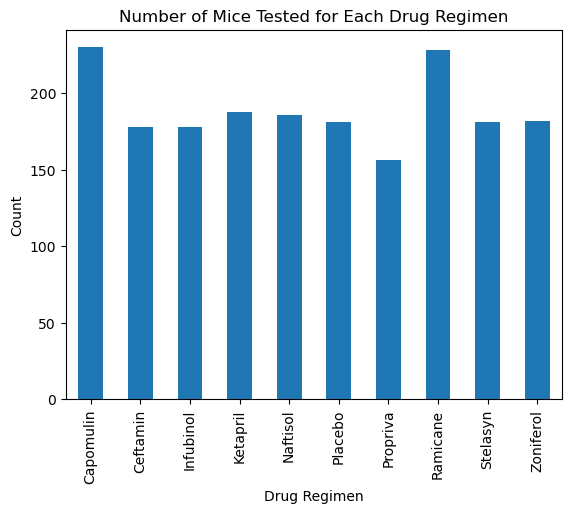

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_sum = cleaned__mouse_study_data.groupby('Drug Regimen')['Mouse ID'].count()
#timepoints_sum
timepoints_sum_data_frame = {'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
                             'Count': [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]}
df = pd.DataFrame(timepoints_sum_data_frame)
df.plot(kind='bar', x='Drug Regimen', y='Count', legend=None)
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Number of Mice Tested for Each Drug Regimen')
plt.show()

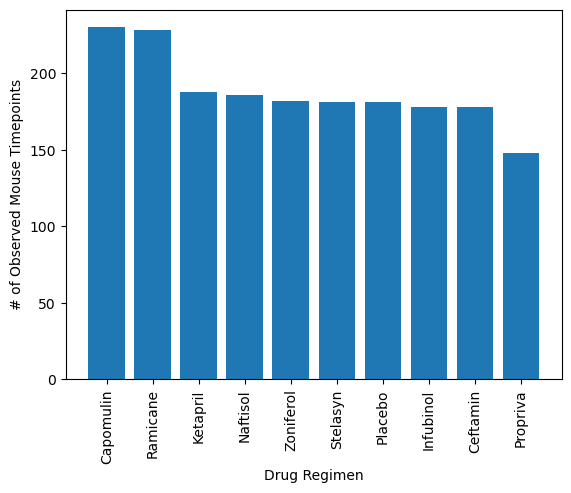

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_sum = cleaned__mouse_study_data.groupby('Sex')['Mouse ID'].count()
number_of_females = 930
number_of_males = 958
total_population = number_of_females + number_of_males
male_percentage = number_of_males / total_population
print("Male Percentage:", male_percentage)
female_percentage = number_of_females / total_population
print("Female Percentage:", female_percentage)

Male Percentage: 0.5074152542372882
Female Percentage: 0.4925847457627119


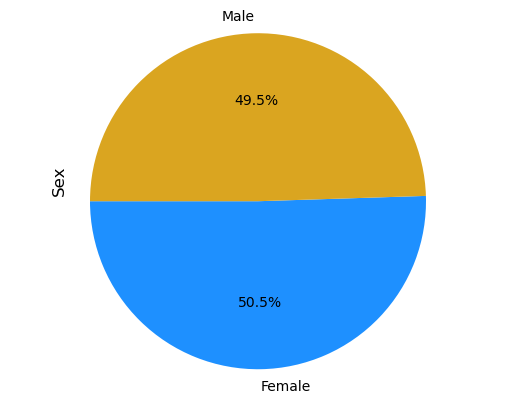

In [55]:
labels = ["Female", "Male"]
sizes = [50,49]
colors = ["dodgerblue", "goldenrod"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.title('Sex', rotation='vertical', x=0.1, y=0.5)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_timepoint_max = combined_mouse_study_data.groupby('Mouse ID')['Timepoint'].max()

grouped_timepoint_max = grouped_timepoint_max.reset_index()
#grouped_timepoint_max = grouped_timepoint_max.rename(columns={'Timepoint': 'Last Timepoint'})
grouped_timepoint_max

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_volume_df = pd.merge(grouped_timepoint_max, combined_mouse_study_data, on=['Mouse ID', 'Timepoint'], how='inner')
merged_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create emptumor_volume_data = []ty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    quartiles = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


# Locate the rows which contain mice on each drug and get the tumor volumes
#for treatment in treatments:
    treatment_data = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)
                      

    
    # add subset 
#subset_data = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == 'Capomulin']
#subset_data = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == 'Ramicane']
#subset_data = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == 'Infubinol']
#subset_data = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == 'Ceftamin']   

    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

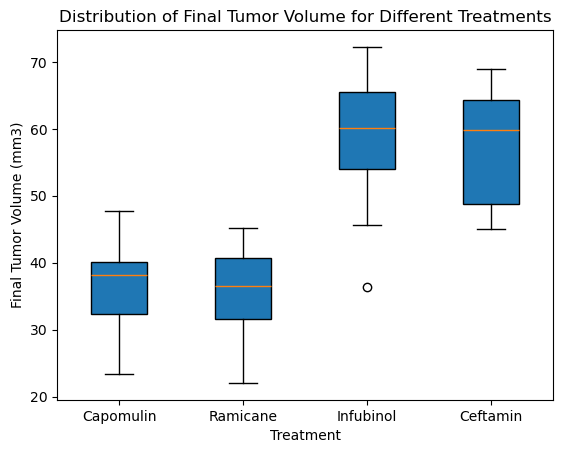

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_data, labels=treatments, patch_artist=True)
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Distribution of Final Tumor Volume for Different Treatments')
plt.show()

## Line and Scatter Plots

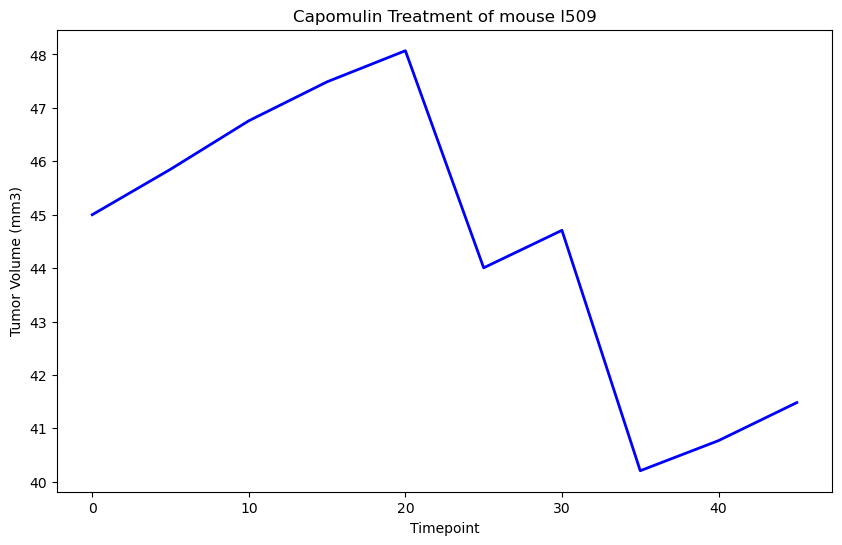

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
 # Select a single mouse ID treated with Capomulin
mouse_id = 'l509'  

# Filter the data for the selected mouse treated with Capomulin
mouse_data = combined_mouse_study_data[(combined_mouse_study_data['Drug Regimen'] == 'Capomulin') & (combined_mouse_study_data['Mouse ID'] == mouse_id)]

# Extract the time points and tumor volumes for the selected mouse
time_points = mouse_data['Timepoint']
tumor_volumes = mouse_data['Tumor Volume (mm3)']

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volumes, marker='', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of mouse {mouse_id}')


# Show the plot

plt.show()

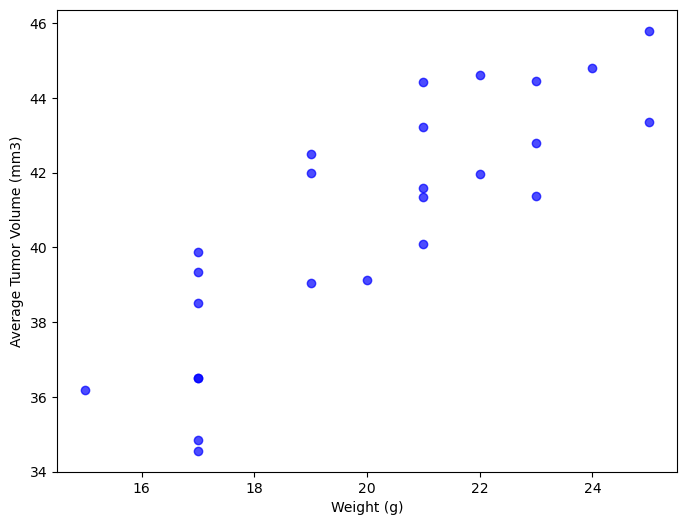

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = combined_mouse_study_data.loc[combined_mouse_study_data['Drug Regimen'] == 'Capomulin']

# Select relevant columns
capomulin_data = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
# Group by 'Mouse ID' to calculate the average tumor volume and weight
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = merged_tumor_volume_df[merged_tumor_volume_df['Drug Regimen'] == 'Capomulin']

# Calculate the correlation coefficient between mouse weight and tumor volume
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Print the correlation coefficient and linear regression results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression Model: Tumor Volume (mm3) = {slope:.2f} * Weight (g) + {intercept:.2f}")

Correlation Coefficient: 0.876706040365812
Linear Regression Model: Tumor Volume (mm3) = 1.75 * Weight (g) + 1.45


In [67]:
# Group by 'weight' and calculate the average tumor volume for each weight
capomulin_data = merged_tumor_volume_df[merged_tumor_volume_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume_by_weight = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
average_tumor_volume_by_weight

Weight (g)
15    28.484033
17    30.287623
19    36.416666
20    37.311846
21    39.175015
22    39.571049
23    39.602030
24    47.685963
25    44.060363
Name: Tumor Volume (mm3), dtype: float64

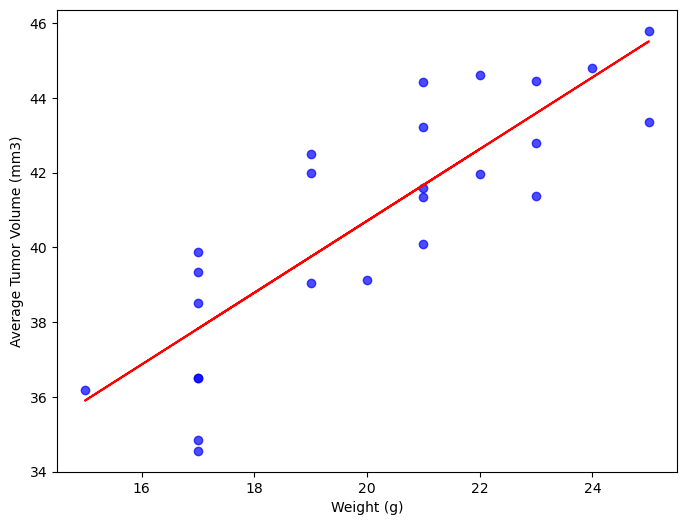

In [78]:
# Plot a scatter plot of weight versus average total volume
# Filter the data for the Capomulin regimen
capomulin_data = combined_mouse_study_data.loc[combined_mouse_study_data['Drug Regimen'] == 'Capomulin']

# Select relevant columns
capomulin_data = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
# Group by 'Mouse ID' to calculate the average tumor volume and weight
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='blue', alpha=0.7)
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Create equation of line to calculate predicted number of average tumor volume
w_fit = slope * capomulin_data['Weight (g)'] + intercept
plt.plot(capomulin_data['Weight (g)'],w_fit,"-",color="red")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

In [83]:
correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])
rounded_correlation = round(correlation, 2)
print("The correlation between Weight and Average Total Volume:", rounded_correlation)

The correlation between Weight and Average Total Volume: 0.84
